## Regression with python and statsmodels

A quick illustration of linear regression with `statsmodels` package. It mostly parallels lecture notes on regression on class website

In [1]:
import numpy as np
import statsmodels.formula.api as sm
import pandas as pd
from plotnine import *

Let's read the `mpg` dataset we used in lecture notes. Note we give the type for `origin` so it is read as a categorical variable.

In [2]:
mpg = pd.read_csv('data/auto-mpg.csv', dtype={'origin': np.str})
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We will start with simple regression of mpg regressed on weight.

/Users/guomukun/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


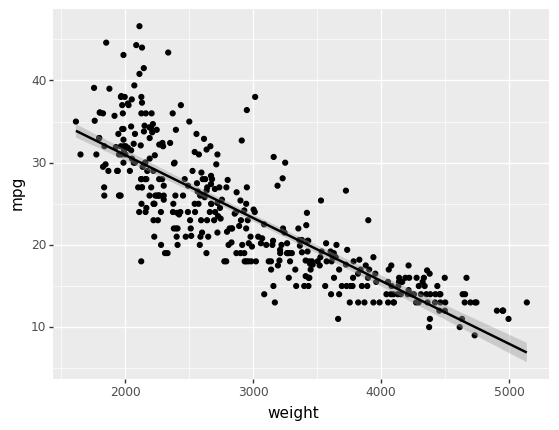

<ggplot: (7557447225)>

In [3]:
(ggplot(mpg, aes(x='weight', y='mpg'))
     + geom_point()
     + geom_smooth(method='lm'))

In [35]:
simple_res = sm.ols('mpg~weight', data=mpg).fit()
simple_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          6.02e-102
Time:                        20:00:49   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can extract fit information from result object. Here is a list of its contents

In [36]:
dir(simple_res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


For example, we can access estimated parameters

In [37]:
simple_res.params

Intercept    46.216525
weight       -0.007647
dtype: float64

To make a residuals vs. fitted plot, we can add that information to our original data

In [38]:
mpg_copy = mpg.copy()
mpg_copy['fitted'] = simple_res.fittedvalues
mpg_copy['resid'] = simple_res.resid

Now we can make our plot

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


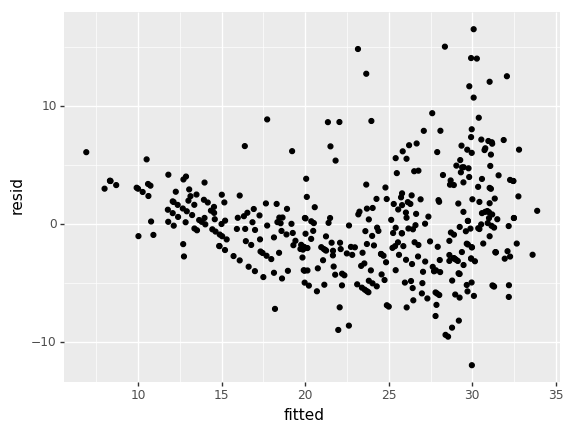

<ggplot: (317328981)>

In [39]:
(ggplot(mpg_copy, aes(x='fitted', y='resid'))
   + geom_point())

We can expand formula to fit multiple linear regression model

In [40]:
multi_res = sm.ols('mpg~1+weight+cylinders+horsepower+displacement+year', data=mpg).fit()
multi_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     326.8
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          2.82e-136
Time:                        20:01:01   Log-Likelihood:                -1036.8
No. Observations:                 392   AIC:                             2086.
Df Residuals:                     386   BIC:                             2109.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.7795      4.274     -2.990      0.003     -21.183      -4.376
weight          -0.0065      0.001    -11.122      0.000      -0.008      -0.005
cylinders       -0.3437      0.332     -1.037      0.301      -0.996       0.308
horsepower      -0.0077      0.011     -0.721      0.471      -0.029       0.013
displacement     0.0070      0.007      0.957      0.339      -0.007       0.021
year             0.7499      0.052     14.302      0.000       0.647       0.853
==============================================================================
Omnibus:                       42.042   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.268
Skew:                           0.669   Prob(JB):                     5.51e-16
Kurtosis:                       4.585   Cond. No.                     7.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now a model with interactionsm.

In [42]:
interact_res = sm.ols('mpg~weight*origin', data=mpg).fit()
interact_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          1.72e-100
Time:                        20:01:11   Log-Likelihood:                -1120.7
No. Observations:                 392   AIC:                             2253.
Df Residuals:                     386   BIC:                             2277.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.1485      1.186     36.378      0.000      40.816      45.481
origin[T.2]            1.1247      2.878      0.391      0.696      -4.534       6.783
origin[T.3]           11.1117      3.574      3.109      0.002       4.084      18.139
weight                -0.0069      0.000    -20.020      0.000      -0.008      -0.006
weight:origin[T.2]  3.575e-06      0.001      0.003      0.997      -0.002       0.002
weight:origin[T.3]    -0.0039      0.002     -2.508      0.013      -0.007      -0.001
==============================================================================
Omnibus:                       45.388   Durbin-Watson:                   0.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.270
Skew:                           0.746   Prob(JB):                     5.51e-16
Kurtosis:                       4.440   Cond. No.                     5.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And to replicate the plot in lecture notes illustrating different intercept and slopes of the interaction model:

/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/plotnine/utils.py:284: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5191: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/pandas/core/generic.py:5192: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/hcorrada/opt/miniconda3/envs/cmsc320/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


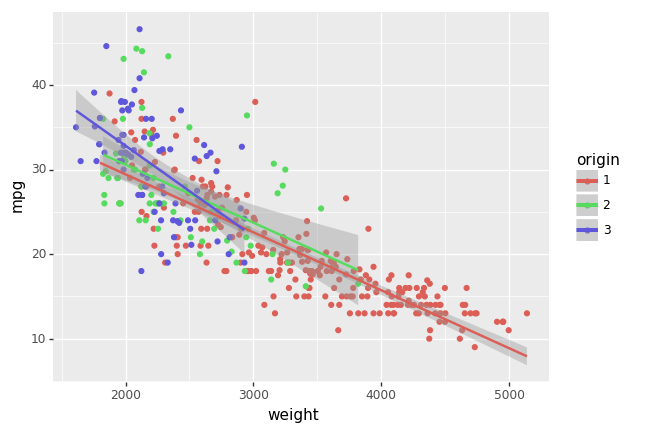

<ggplot: (317784559)>

In [43]:
(ggplot(mpg, aes(x='weight', y='mpg', color='origin'))
         + geom_point()
         + geom_smooth(method='lm'))